<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+2><b> ОЦЕНКА РЕЗУЛЬТАТОВ АВ ТЕСТА </b></font>

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

<font size=+2><b> ПЛАН РАБОТЫ: </b></font>

<font size=+1><b> 1. Приоритизация гипотез. </b></font>

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

<font size=+1><b> 2. Подготовка данных. </b></font>

<font size=+1><b> 3. Анализ A/B-теста. </b></font>

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv. Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

<font size=+1><b> 4. Выводы. </b></font>

Примите решение по результатам теста и объясните его. Варианты решений:
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.
</div>    

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+2><b> 1. ПРИОРИТИЗАЦИЯ ГИПОТЕЗ. </b></font>

<font size=+1><b> 1.1. Загрузка данных о гипотезах. </b></font>

Описание данных:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st

In [2]:
try:
    hyp = pd.read_csv('hypothesis.csv')
except:
    hyp = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hyp

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 1.2. Применение фреймворка ICE для приоритизации гипотез. </b></font>

По данному фреймворку наиболее приоритетная гипотеза под номером 8 ("Запустить акцию, дающую скидку на товар в день рождения").
</div>

In [4]:
hyp['ICE'] = hyp['Impact'] * hyp['Confidence'] / hyp['Efforts']

display(hyp.sort_values(by='ICE', ascending=False))

print('Приоритетнейшая гипотеза по фреймворку ICE: "', hyp.loc[8, 'Hypothesis'], '"')

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


Приоритетнейшая гипотеза по фреймворку ICE: " Запустить акцию, дающую скидку на товар в день рождения "


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 1.3. Применение фреймворка RICE для приоритизации гипотез. </b></font>

По данному фреймворку наиболее приоритетная гипотеза под номером 7 ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"). Данная гипотеза была на 3-ем месте по параметру ICE, а сейчас выбилась в лидеру благодаря максимальному параметру Reach (охвату). У двух предыдуших лидеров данный показатель очень мал.
</div>

In [5]:
hyp['RICE'] = hyp['Impact'] * hyp['Confidence'] * hyp['Reach'] / hyp['Efforts']

display(hyp.sort_values(by='RICE', ascending=False))

print('Приоритетнейшая гипотеза по фреймворку RICE: "', hyp.loc[7, 'Hypothesis'], '"')

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Приоритетнейшая гипотеза по фреймворку RICE: " Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок "


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+2><b> 2. ПОДГОТОВКА ДАННЫХ. </b></font>

<font size=+1><b> 2.1. Загрузка данных A/B-теста и общая информация. </b></font>

Описание данных, файл /datasets/orders.csv:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.
</div>

In [6]:
try:
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
orders.info()
print()

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 2.2. Поиск пропущенных значений. </b></font>

Проущенных значений в датасетах нет.

<font size=+1><b> 2.3. Изменение типа данных. </b></font>

Приведём данные с id к типу object, с датами - к типу datetime. Также приведём названия столбцов в orders к "змеиному" регистру.
</div>

In [8]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders[['transaction_id', 'visitor_id']] = orders[['transaction_id', 'visitor_id']].astype('object')
orders['date'] = pd.to_datetime(orders['date'])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   object        
 1   visitor_id      1197 non-null   object        
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.9+ KB


In [9]:
visitors['date'] = pd.to_datetime(visitors['date'])

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 2.4. Поиск дубликатов. </b></font>

Осуществим поиск дубликатов в датасетах: явных и неявных (в тех столбцах, где это имеет смысл).

И явных, и неявных дубликатов нигде не обнаружено.
</div>

In [10]:
print('Количество явных дубликатов в orders:', orders.duplicated().sum(), '\n')
print('Количество явных дубликатов в visitors:', visitors.duplicated().sum())

Количество явных дубликатов в orders: 0 

Количество явных дубликатов в visitors: 0


In [11]:
print('Дубликаты в transaction_id (датасет orders):', orders.shape[0] - orders['transaction_id'].nunique(), '\n')
print('Уникальные значения в group (датасет orders):', orders.sort_values(by='group')['group'].unique(), '\n')
print('Уникальные значения в group (датасет visitors):', visitors.sort_values(by='group')['group'].unique(), '\n')

Дубликаты в transaction_id (датасет orders): 0 

Уникальные значения в group (датасет orders): ['A' 'B'] 

Уникальные значения в group (датасет visitors): ['A' 'B'] 



In [12]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 2.5. Поиск аномальных значений. </b></font>

На данном этапе предобработки данных поиск аномальных значений проводиться не будет: это будет отдельным пунктом анализа результатов А/В теста.
</div>

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+2><b> 3. АНАЛИЗ A/B-ТЕСТА. </b></font>

<font size=+1><b> 3.1. Создание датафреймов для анализа в т.ч. с кумулятивными метриками. </b></font>

Отметим отдельно что относительная разница между размерами групп А и В теста менее 1%. Сделаем допущение, что это приемлемо для нашего случая, где, очевидно, предполагалось разделение 50/50.
    
Однако, очень важно то, что пользователи могли совершать покупки в разных группах теста. Причём, судя по сводной таблице, смены групп теста могли происходить и не один раз. Этот факт говорит о несовершенстве деления на группы и должен быть доработан в других А/В тестах продукта, если таковые будут проводиться. В нашем дальнейшем анализе не будем изменять состав выборок, так неизвестны причины попадания пользователей в две группы: логи посещений (а не только покупок) недоступны, запросить новые данных в рамках учебного проекта нельзя.
</div>

In [13]:
print('Количество уникальных покупателей:', orders['visitor_id'].nunique(), '\n')

print('Количество пользователей, делавших покупки в обеих группах:', orders.query('group == "B"')['visitor_id'].nunique() 
      + orders.query('group == "A"')['visitor_id'].nunique() - orders['visitor_id'].nunique(), '\n')

print('Варианты посещений групп теста уникальными пользователями:')
orders.sort_values(by='date').groupby('visitor_id', as_index=False).agg({'group': 'sum'}).value_counts('group')

Количество уникальных покупателей: 1031 

Количество пользователей, делавших покупки в обеих группах: 58 

Варианты посещений групп теста уникальными пользователями:


group
B              510
A              427
BA              18
AB              17
BB              16
AA              13
AAA              5
BAA              3
ABB              3
BBB              2
BBA              2
BBBAB            1
BBBA             1
BBABB            1
BBAB             1
BBAAAABBB        1
AABA             1
BAB              1
BAAAA            1
AABAA            1
ABBBAABBAAB      1
ABBAA            1
ABABABAAAAB      1
ABABAAAB         1
ABA              1
BBBBA            1
dtype: int64

In [14]:
size_a = visitors.query('group == "A"')['visitors'].sum()
size_b = visitors.query('group == "B"')['visitors'].sum()

print('Количество посещений в группе А:', size_a, '\n')
print('Количество посещений в группе B:', size_b, '\n')
print('Относительная разница в группах теста:', "{0:.2f}".format((size_b/size_a-1)*100), '%')

Количество посещений в группе А: 18736 

Количество посещений в группе B: 18916 

Относительная разница в группах теста: 0.96 %


In [15]:
df = orders.groupby(['date', 'group'], as_index=False).agg({'transaction_id': 'count', 'visitor_id': 'nunique', 
                                                            'revenue': 'sum'})
df = df.rename(columns={'transaction_id': 'orders', 'visitor_id': 'payers'})


df = df.merge(visitors, how='inner', on=['date', 'group'])

cumulative_a = df.query('group == "A"').copy()
cumulative_b = df.query('group == "B"').copy()

for data in [cumulative_a, cumulative_b]:
    data[['orders', 'payers', 'revenue', 'visitors']] = data[['orders', 'payers', 'revenue', 'visitors']].cumsum()
    data['avg_cheque'] = (data['revenue'] / data['orders']).map(lambda x: "{0:.2f}".format(x)).astype('float')
    data['conversion'] = (data['payers'] / data['visitors']).map(lambda x: "{0:.4f}".format(x)).astype('float')

display(df.head(6))
display(cumulative_a.tail())
cumulative_b.tail()

,date,group,orders,payers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,20,19,93822,619
3,2019-08-02,B,24,23,165531,581
4,2019-08-03,A,24,24,112473,507
5,2019-08-03,B,16,16,114248,509


,date,group,orders,payers,revenue,visitors,avg_cheque,conversion
52,2019-08-27,A,495,482,3514698,16376,7100.40,0.0294
54,2019-08-28,A,512,499,3615820,16970,7062.15,0.0294
56,2019-08-29,A,534,521,3936510,17547,7371.74,0.0297
58,2019-08-30,A,545,531,4022970,18037,7381.60,0.0294
60,2019-08-31,A,557,543,4084803,18736,7333.58,0.0290


,date,group,orders,payers,revenue,visitors,avg_cheque,conversion
53,2019-08-27,B,548,537,5232260,16523,9547.92,0.0325
55,2019-08-28,B,576,564,5328268,17177,9250.47,0.0328
57,2019-08-29,B,596,584,5559398,17708,9327.85,0.0330
59,2019-08-30,B,620,608,5774631,18198,9313.92,0.0334
61,2019-08-31,B,640,628,5907760,18916,9230.88,0.0332


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 3.2. Анализ графиков выручки, среднего чека. </b></font>

Выводы по трём графикам:

- Кумулятивная выручка в двух группах была на одном уровне по 5-е августа; была несколько больше в группе B с 6-го по 18-е августа; стала значительно больше после 19 августа.
- Средний чек большую часть периода до 18 августа был больше в группе В, но со значительными флуктуациями; с 19-го августа он стал заметно больше в группе В.
- К концу августа относительная разница между средними чеками падала -  примерно до 27%.

Графики кумулятивной выручки и среднего чека позволяют нам выдвинуть гипотезу теста о том, что средний чек в группе B больше нежели в группе А. Однако значительный скачок в раойоне 19 августа выглядит странным и требует дополнительного внимания.
</div>

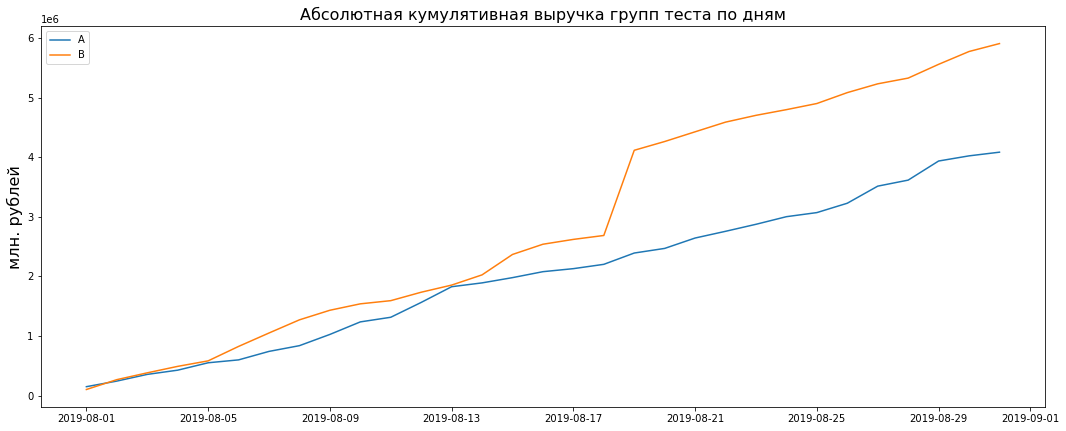

In [16]:
plt.figure(figsize=(18, 7))
plt.plot(cumulative_a['date'], cumulative_a['revenue'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['revenue'], label='B')
plt.legend()
plt.ylabel('млн. рублей', fontsize=16)
plt.title('Абсолютная кумулятивная выручка групп теста по дням', fontsize=16)
plt.show()

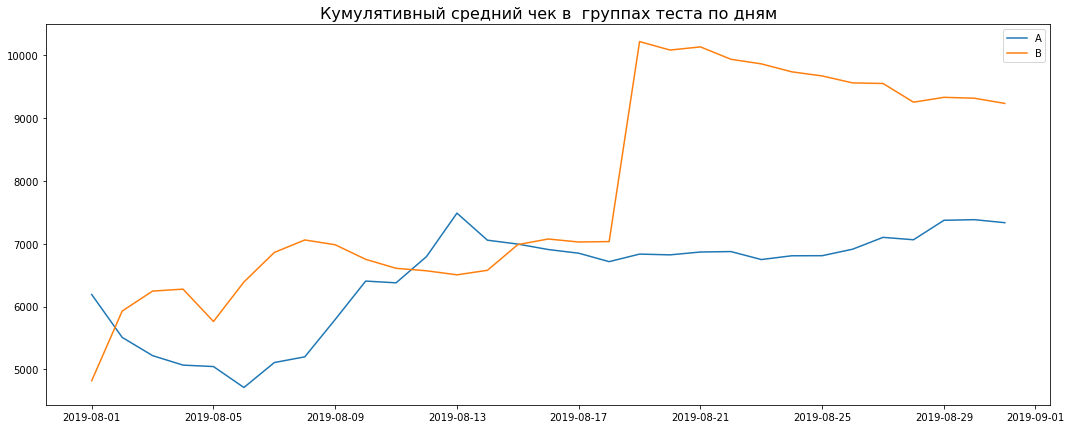

In [17]:
plt.figure(figsize=(18, 7))
plt.plot(cumulative_a['date'], cumulative_a['avg_cheque'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['avg_cheque'], label='B')
plt.legend()
plt.title('Кумулятивный средний чек в  группах теста по дням', fontsize=16)
plt.show()

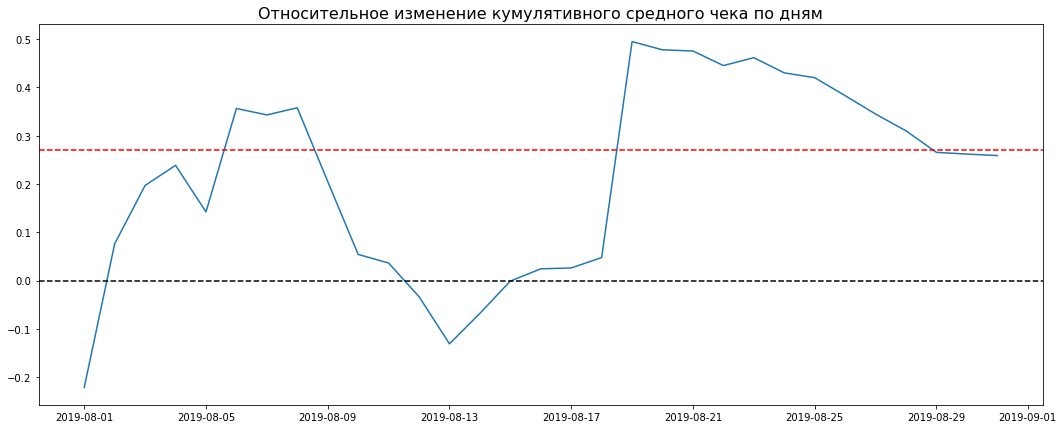

In [18]:
cumulative_merged = cumulative_a.merge(cumulative_b, on='date', suffixes=['_a', '_b'])

plt.figure(figsize=(18, 7))
plt.plot(cumulative_merged['date'], cumulative_merged['avg_cheque_b']/cumulative_merged['avg_cheque_a']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.27, color='red', linestyle='--')
plt.title('Относительное изменение кумулятивного средного чека по дням', fontsize=16)
plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 3.3. Анализ графиков конверсии. </b></font>

Выводы по графикам конверсии:

- Большую часть августа конверсия в группе В выше чем в группе А.
- С 10 августа эта разница является значительной и остаётся таковой до конца месяца, хоть и несколько снижается.

По данным этих графиков можем выдвинуть вторую гипотезу теста о том, что конверсия в группе В выше чем в группе А. Эта разница в конверсии могла бы объяснить соотвествующую разницу и в кумулятивной выручке. Однако на графиках конверсий нет "всплесков" в районе 19-го августа, что ещё раз говорит нам о необходимости изучить выбросы в данных. Из-за подобных выбросов описанные выше гипотеза о разнице в средних чеках может не подтвердиться.
</div>

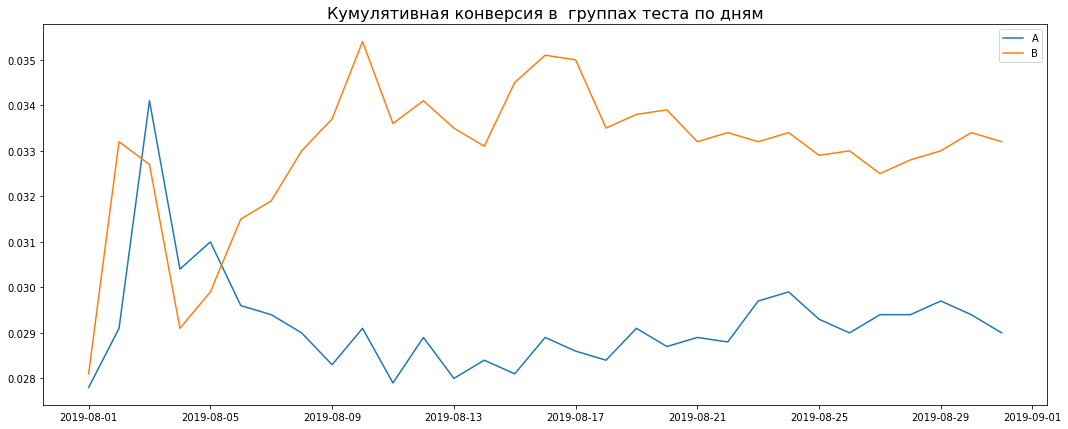

In [19]:
plt.figure(figsize=(18, 7))
plt.plot(cumulative_a['date'], cumulative_a['conversion'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия в  группах теста по дням', fontsize=16)
plt.show()

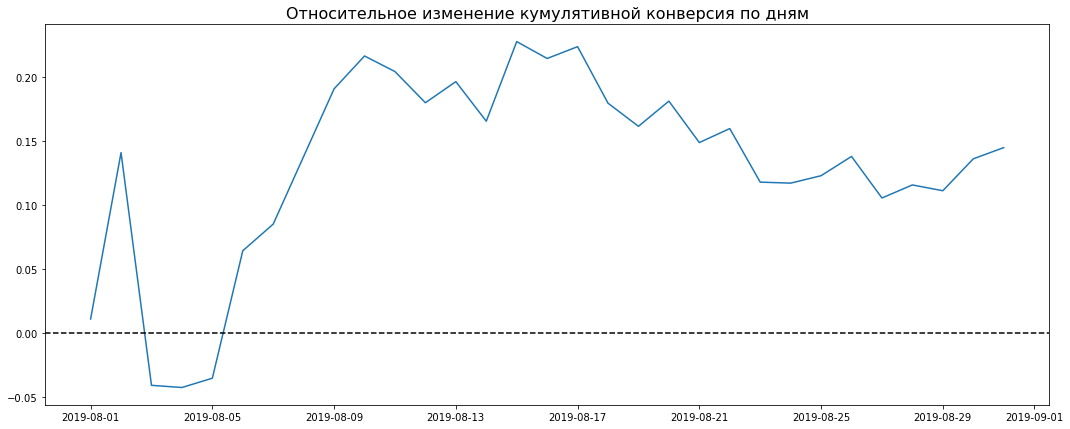

In [20]:
plt.figure(figsize=(18, 7))
plt.plot(cumulative_merged['date'], cumulative_merged['conversion_b']/cumulative_merged['conversion_a']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивной конверсия по дням', fontsize=16)
plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 3.4. Поиск аномальных данных. </b></font>

На диаграмме рассеяния видно, что существуют некоторое количество пользователей с большим количеством заказов. Основываясь на визуальных данных, я бы указал на количество 8 как нижнюю границу данных пользователей. Однако, даже 99-й перцентиль равен 4. Поэтому для точности данных по анализу конверсии я всё же возьму именно 4 как границу разделения пользователей.
</div>

Всего покупателей: 1031


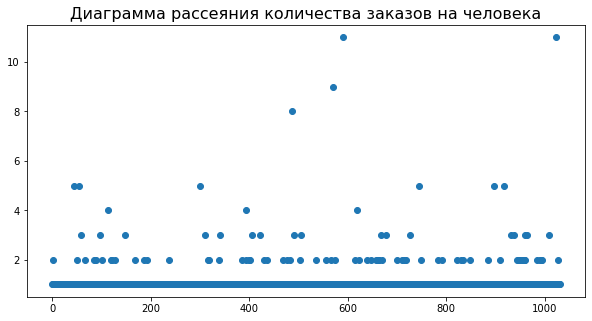

In [21]:
avg_orders = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})

avg_orders.columns=('visitor_id', 'number_of_orders')

print('Всего покупателей:', avg_orders.shape[0])

plt.figure(figsize=(10, 5))
x_numbers = pd.Series(range(0,len(avg_orders['number_of_orders'])))
plt.scatter(x_numbers, avg_orders['number_of_orders'])
plt.title('Диаграмма рассеяния количества заказов на человека', fontsize=16)
plt.show()

In [22]:
print('95/99-е перцентили для количества заказов на человека:', np.percentile(avg_orders['number_of_orders'], [95, 99])) 

display(avg_orders.sort_values(by='number_of_orders', ascending=False).head(20))

order_limit = (np.percentile(avg_orders['number_of_orders'], [99]))[0]

95/99-е перцентили для количества заказов на человека: [2. 4.]


,visitor_id,number_of_orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 3.4. Поиск аномальных данных (продолжение). </b></font>

По диаграмме рассеяния можно отметить, что есть два аномально больших заказа. Если построить ещё одну диаграмму рассеяния по срезу их стоимости, то видно, что распределение оставшихся заказов выглядит более приемлемо для анализа. Однако опять же для точности анализа (но уже среднего чека) возьмём формальную границу, равную 99-му перцентилю.

В итоге, границы для определения "нормальных" пользователей и чеков оставим следующими: количество заказов <= 4 и сумма заказов <= 58233.2.
</div>

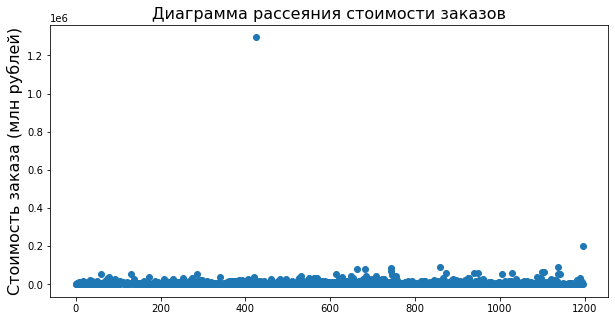

In [23]:
plt.figure(figsize=(10, 5))
x_orders = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_orders, orders['revenue'])
plt.title('Диаграмма рассеяния стоимости заказов', fontsize=16)
plt.ylabel('Стоимость заказа (млн рублей)', fontsize=16)
plt.show()

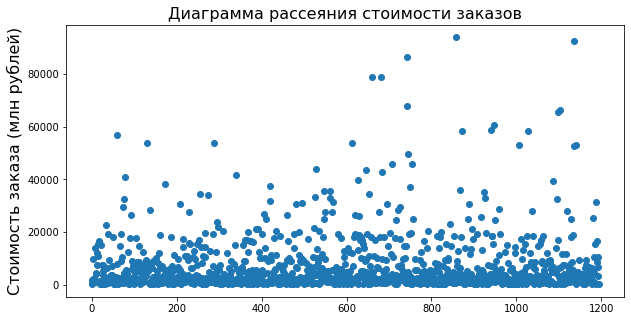

95/99-е перцентили для стоимости заказа: [28000.  58233.2]


In [24]:
rev_anomal = 200000

plt.figure(figsize=(10, 5))
x_orders2 = pd.Series(range(0,len(orders.query('revenue < @rev_anomal')['revenue'])))
plt.scatter(x_orders2, orders.query('revenue < @rev_anomal')['revenue'])
plt.title('Диаграмма рассеяния стоимости заказов', fontsize=16)
plt.ylabel('Стоимость заказа (млн рублей)', fontsize=16)
plt.show()

print('95/99-е перцентили для стоимости заказа:', np.percentile(orders['revenue'], [95, 99]))

rev_limit = (np.percentile(orders['revenue'], [99]))[0]

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 3.5. Подсчёт значимости различий в конверсии по "сырым" данным. </b></font>

Так как конверсия - это доля, то равенство конверсий будем проверять как равенство долей. Для этого будем использовать формулу из теории. Примем за нулевую гипотезу утверждение о равенстве долей в группе А и группе В теста. Тогда альтернативной гипотезой будет утверждение о неравенстве долей в этих группах. Также установим уровень значимости alpha, равный 0.05.

Согласно нашим расчётам, есть значимая разница в конверсиях: в группе В она больше. В относительных значениях эта разница  составляет 14,48%.
</div>

In [25]:
cumulative_merged.tail(1)

,date,group_a,orders_a,payers_a,revenue_a,visitors_a,avg_cheque_a,conversion_a,group_b,orders_b,payers_b,revenue_b,visitors_b,avg_cheque_b,conversion_b
30,2019-08-31,A,557,543,4084803,18736,7333.58,0.029,B,640,628,5907760,18916,9230.88,0.0332


In [26]:
p_total_raw = (cumulative_merged.loc[30, 'payers_b']+cumulative_merged.loc[30, 'payers_a'])/(cumulative_merged
                                                            .loc[30, 'visitors_a']+cumulative_merged.loc[30, 'visitors_b'])

z_value_raw = (cumulative_merged.loc[30, 'conversion_b'] - 
           cumulative_merged.loc[30, 'conversion_a'])/math.sqrt(p_total_raw*(1-p_total_raw)*(1/size_a+1/size_b))

distr = st.norm(0, 1)

p_value_raw_conv = (1 - distr.cdf(abs(z_value_raw))) * 2

print('p-значение: ', p_value_raw_conv)

alpha = 0.05

if p_value_raw_conv < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
    
print('Относительная разница конверсий:', 
      "{0:.2f}".format(cumulative_merged.loc[30, 'conversion_b']*100/cumulative_merged.loc[30, 'conversion_a']-100), '%')

p-значение:  0.018905635034340396
Отвергаем нулевую гипотезу: между долями есть значимая разница
Относительная разница конверсий: 14.48 %


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 3.6. Подсчёт значимости различий в конверсии по "очищенным" данным. </b></font>

Как было описано выше, в датасете обнаружено некоторое количество пользователей с большим количеством заказов. Данные пользователи могли оказать влияние на конверсию, поэтому подготовим новый массив данных без них и пересчитываем статистику.

При подсчёте статистики по "очищенным" данным были получены ещё более значимые различия (практически на уровне 0.01), а относительная разница конверсий выросла до 16.27%.
</div>

In [27]:
avg_orders

,visitor_id,number_of_orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [28]:
anomal_users = list(avg_orders.query('number_of_orders > @order_limit')['visitor_id'])
anomal_users

[199603092,
 237748145,
 1230306981,
 2038680547,
 2378935119,
 2458001652,
 3062433592,
 3717692402,
 3803269165,
 4256040402]

In [29]:
df_anomal = orders.query('visitor_id in @anomal_users').groupby(['date', 'group'], 
                                                                     as_index=False).agg({'visitor_id': 'nunique'})

df_anomal = df_anomal.groupby('group', as_index=False).agg({'visitor_id': 'sum'})

df_anomal

,group,visitor_id
0,A,32
1,B,28


In [30]:
cumulative_merged.tail(1)

,date,group_a,orders_a,payers_a,revenue_a,visitors_a,avg_cheque_a,conversion_a,group_b,orders_b,payers_b,revenue_b,visitors_b,avg_cheque_b,conversion_b
30,2019-08-31,A,557,543,4084803,18736,7333.58,0.029,B,640,628,5907760,18916,9230.88,0.0332


In [31]:
size_a2 = size_a - df_anomal.loc[0, 'visitor_id']
size_b2 = size_b - df_anomal.loc[1, 'visitor_id']
payers_a2 = cumulative_merged.loc[30, 'payers_a'] - df_anomal.loc[0, 'visitor_id']
payers_b2 = cumulative_merged.loc[30, 'payers_b'] - df_anomal.loc[1, 'visitor_id']

p_total_filtred = (payers_a2 + payers_b2)/(size_a2 + size_b2)

z_value_filtred = (payers_b2/size_b2 - payers_a2/size_a2)/math.sqrt(p_total_filtred*(1-p_total_filtred)*(1/size_a2+1/size_b2))

p_value_filtred_conv = (1 - distr.cdf(abs(z_value_filtred))) * 2

print('p-значение: ', p_value_filtred_conv)

if p_value_filtred_conv < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
    
print('\nОтносительная разница конверсий:', 
      "{0:.2f}".format((payers_b2/size_b2)*100/(payers_a2/size_a2) - 100), '%\n')

print('Значения конверсий по отфильтрованным данным для групп А и В соотвественно:', round(payers_a2/size_a2, 4), 
      'и', round(payers_b2/size_b2, 4))

p-значение:  0.010930756017438314
Отвергаем нулевую гипотезу: между долями есть значимая разница

Относительная разница конверсий: 16.27 %

Значения конверсий по отфильтрованным данным для групп А и В соотвественно: 0.0273 и 0.0318


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 3.7. Подсчёт значимости различий по средним чекам по "сырым" данным. </b></font>

В начале проверим, является ли распределение стоимостей покупок нормальным. Для этого воспользуемся критерием согласия Колмогорова. Нулевой гипотезой в нашем случае станет утверждение о принадлежности выборки к нормальному распределению. Альтерантивная гипотеза - выборочное распределение отлично от нормального распределения. Как видно, для уровня значимости alpha = 0.05 можно утверждать, что выборки стоимостей покупок для двух групп не принадлежать к нормальному распределению.
    
В таком случае для проверки равенства средних значений в этих выборках следует использовать непараметрический критерий, а именно U-критерий Манна-Уитни. Нулевая гипотеза: нет различий между уровнями стоимости заказов. Альтернативная гипотеза: есть различия между уровнями стоимости заказа. Примем уровень значимости alpha = 0.05.

Для "сырых" данных отличий в уровне стоимости заказов нет; другими словами, нет различий в среднем чеке для А и В групп теста.
</div>

In [32]:
print('P-value критерия Колмогорова для стоимости покупок в группе А:', 
      st.kstest(list(orders.query('group == "A"')['revenue']), 'norm')[1])
print('P-value критерия Колмогорова для стоимости покупок в группе В:', 
      st.kstest(list(orders.query('group == "B"')['revenue']), 'norm')[1])

P-value критерия Колмогорова для стоимости покупок в группе А: 0.0
P-value критерия Колмогорова для стоимости покупок в группе В: 0.0


In [33]:
print('P-value для стоимостей покупок в группах А и В теста:', 
      st.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1])

P-value для стоимостей покупок в группах А и В теста: 0.7292909855432458


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 3.8. Подсчёт значимости различий по средним чекам по "очищенным" данным. </b></font>

Как было показано выше, есть смысл избавиться от выбросов в данных. Пересчитаем статистику для среза данных по стоимости с теми же гипотезами и уровнем значимости.

Несмотря на то, что p-value снизился, он также значительно превышает alpha, т.е. отличий в уровне стоимости заказов нет.

Отстутствие значимых различий по среднему чеку даже после фильтра аномальных значений кажется подозрительным: рассмотрим гистрограммы распределения стоимости покупок на очищенных и сырых (за исключением двух "аномальнейших" заказов) данных.
</div>

In [34]:
print('P-value для стоимостей покупок в "очищенных" группах А и В теста:', 
      st.mannwhitneyu(orders.query('group == "A" and revenue <= @rev_limit')['revenue'], 
                      orders.query('group == "B" and revenue <= @rev_limit')['revenue'])[1])

P-value для стоимостей покупок в "очищенных" группах А и В теста: 0.6208626966847455


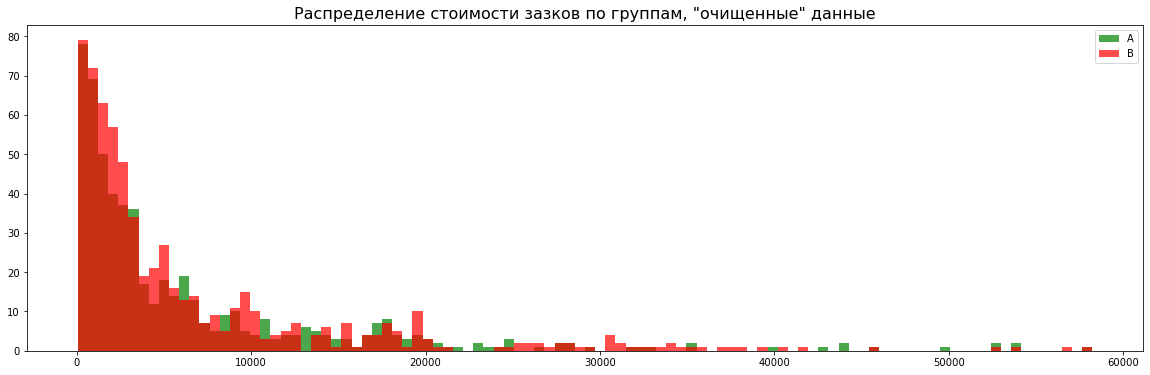

In [35]:
plt.figure(figsize=(20, 6))
plt.hist(orders.query('group == "A" and revenue <= @rev_limit')['revenue'], bins=100, alpha = 0.7, color='green', label='A')
plt.hist(orders.query('group == "B" and revenue <= @rev_limit')['revenue'], bins=100, alpha = 0.7, color='red', label='B')
plt.title('Распределение стоимости зазков по группам, "очищенные" данные', fontsize=16)
plt.legend()
plt.show()

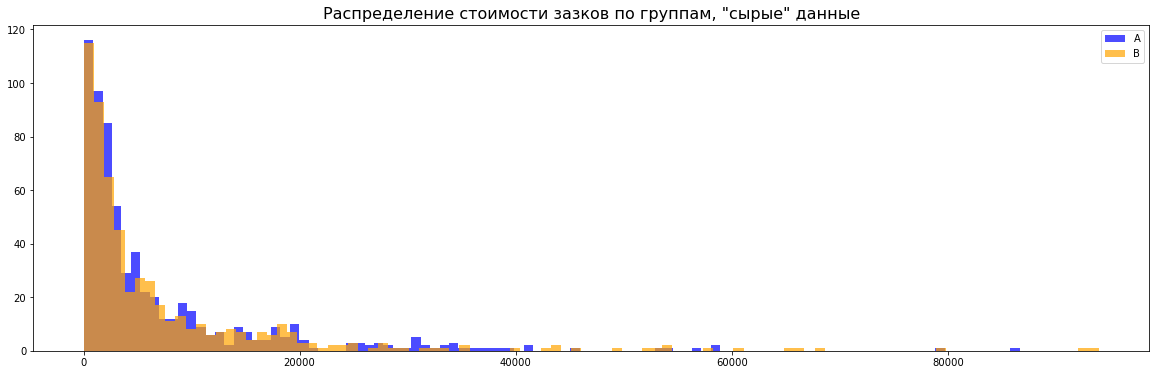

In [36]:
plt.figure(figsize=(20, 6))
plt.hist(orders.query('group == "B" and revenue < @rev_anomal')['revenue'], bins=100, alpha = 0.7, color='blue', label='A')
plt.hist(orders.query('group == "A"')['revenue'], bins=100, alpha = 0.7, color='orange', label='B')
plt.title('Распределение стоимости зазков по группам, "сырые" данные', fontsize=16)
plt.legend()
plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 3.8. Подсчёт значимости различий по средним чекам по "очищенным" данным (продолжение). </b></font>

Визуальный анализ гистрограмм распределения развеивает наши сомнения: во-первых, распределения очень похожи - прозрачность "корзин" позволяет увидеть, что большая их часть окрашена в "смешанный" цвет, то есть распределения в этих местах "совпадают"; во-вторых "отличия" распределены среди обоих групп - на обоих графиках есть участки "чистых" цветов. 
    
Итак, наши выводы об отсутствии статистистических различий в среднем чеке наглядно подтвердились. Таким образом, можно утверждать, что различия же в кумулятивных графиках среднего чека, которые мы наблюдали в начале анализа, получено случайно. Более того, если пересчитать средний чек без двух "аномальнейших" заказов, то он и вовсе окажется больше в группе А! (опять же, эти различия незначимы) 
</div>

In [37]:
print('Средние чеки по группам, "сырые" данные:', round(orders.query('group == "A"')['revenue'].mean()), 'и',
      round(orders.query('group == "B"')['revenue'].mean()), '\n')

print('Средние чеки по группам, "очищенные" данные:', round(orders.query('group == "A"')['revenue'].mean()), 'и',
      round(orders.query('group == "B" and revenue < @rev_anomal')['revenue'].mean()))

Средние чеки по группам, "сырые" данные: 7334 и 9231 

Средние чеки по группам, "очищенные" данные: 7334 и 6913


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 3.9. Пересчёт кумулятивной выручки. </b></font>

Для ответа на финальный вопрос, во-первых, рассмотрим перерисуем график кумулятивной выручки без двух "аномальнейших" заказов, во-вторых, рассмотрим среднее количество покупок на одного пользователя в двух группах.
</div>

In [38]:
display(orders.query('group == "B" and revenue > @rev_anomal'))

df.loc[29:37]

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


,date,group,orders,payers,revenue,visitors
29,2019-08-15,B,31,31,342499,544
30,2019-08-16,A,18,18,99851,361
31,2019-08-16,B,20,20,171690,413
32,2019-08-17,A,10,9,50861,412
33,2019-08-17,B,14,14,81155,421
34,2019-08-18,A,17,17,72398,668
35,2019-08-18,B,9,9,65831,737
36,2019-08-19,A,22,22,189743,502
37,2019-08-19,B,21,20,1429920,487


In [39]:
df_filtred = df.copy()
df_filtred.loc[29, 'revenue'] -= 202740
df_filtred.loc[37, 'revenue'] -= 1294500

cumulative_a_filtred = df_filtred.query('group == "A"').copy()
cumulative_b_filtred = df_filtred.query('group == "B"').copy()

for data in [cumulative_a_filtred, cumulative_b_filtred]:
    data[['orders', 'payers', 'revenue', 'visitors']] = data[['orders', 'payers', 'revenue', 'visitors']].cumsum()
    data['avg_cheque'] = (data['revenue'] / data['orders']).map(lambda x: "{0:.2f}".format(x)).astype('float')
    data['conversion'] = (data['payers'] / data['visitors']).map(lambda x: "{0:.4f}".format(x)).astype('float')

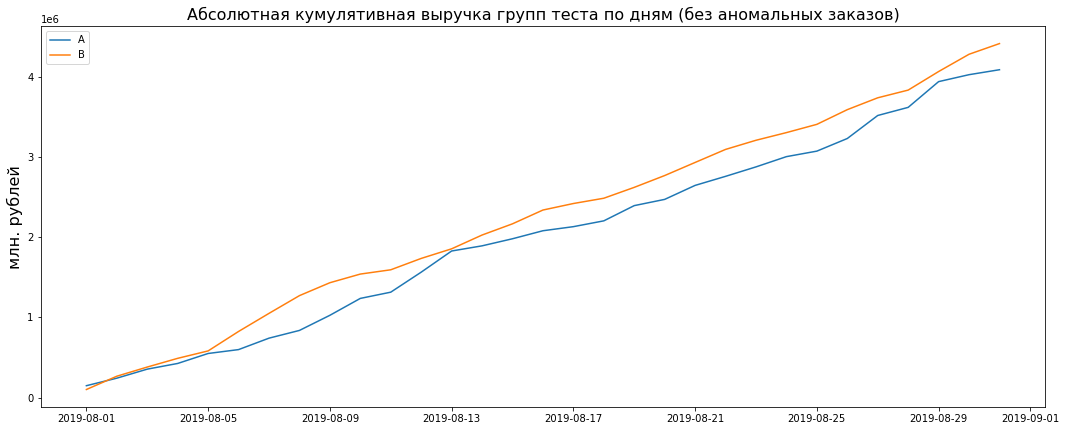

In [40]:
plt.figure(figsize=(18, 7))
plt.plot(cumulative_a_filtred['date'], cumulative_a_filtred['revenue'], label='A')
plt.plot(cumulative_b_filtred['date'], cumulative_b_filtred['revenue'], label='B')
plt.legend()
plt.ylabel('млн. рублей', fontsize=16)
plt.title('Абсолютная кумулятивная выручка групп теста по дням (без аномальных заказов)', fontsize=16)
plt.show()

In [41]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [42]:
avg_group_orders = orders.groupby(['group', 'date'], as_index=False).agg({'transaction_id': 'count', 'visitor_id': 'nunique'})

avg_group_orders = avg_group_orders.groupby('group', as_index=False).agg({'transaction_id': 'sum', 'visitor_id': 'sum'})

avg_group_orders['number_of_orders'] = avg_group_orders['transaction_id'] / avg_group_orders['visitor_id']

avg_group_orders

,group,transaction_id,visitor_id,number_of_orders
0,A,557,543,1.025783
1,B,640,628,1.019108


In [43]:
print('Относительная разница в количестве заказов на одного покупателя:', 
      round((avg_group_orders.loc[0, 'number_of_orders']/avg_group_orders.loc[1, 'number_of_orders']-1)*100, 2), '%')

Относительная разница в количестве заказов на одного покупателя: 0.65 %


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+2><b> 4. ВЫВОДЫ. </b></font>

Разница между кумулятивной выручкой видна, но теперь не так заметна. Количество заказов практически одинаково: в группе А их делают на 0,65% больше в пересчёте на одного покупателя.
    
В проекте нам не удалось ознакомиться с подробным ТЗ А/В теста, но, можно предположить, что заказчиков интересовала в т.ч. суммарная выручка. В контексте нашего теста выгодно декомпозировать выручку как (КОЛИЧЕСТВО ПОСЕТИТЕЛЕЙ) * (КОНВЕРСИЯ) * (КОЛИЧЕСТВО ЗАКАЗОВ НА ОДНОГО ПОКУПАТЕЛЯ) * (СРЕДНИЙ ЧЕК). Рассмотрим каждый множитель:
- Количество посетителей одинаково (с допущением) по условиям А/В теста.
- Как и в случае с количеством посетителей, количество заказов на одного покупателя можем считать одинаковым.
- Различия в среднем чеке - статистически незначимы.
- Соответственно, разница в кумулятивной выручке объясняется при прочих равных разницей в конверсии.
    
В связи с этим я бы принял решение остановить тест, зафиксировав лучший показатель конверсии за группой В (0.0318 против 0.0273, относительная разница  16.27%). Продолжать тест в надежде выявить различия в среднем чеке считаю нецелесообразным: p-value при наших сравнениях слишком далёк от уровня принятия решения.
</div>